
**Exploratory Data Analysis - Retail Store**

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplcursors
matplotlib.use('nbAgg',warn=False, force=True)
import seaborn as sns

df=pd.read_csv("SampleSuperstore.csv")
df

<ipython-input-6-190dc2895cca>:5: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('nbAgg',warn=False, force=True)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Drop unwanted columns**

In [7]:
df=df.drop(columns=['Ship Mode','Country','Postal Code','Segment'])
df.head()

,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Get insights about dataset**

In [8]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          9994 non-null   object 
 1   State         9994 non-null   object 
 2   Region        9994 non-null   object 
 3   Category      9994 non-null   object 
 4   Sub-Category  9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB



**Find sales for each cateory and subcategory**

In [10]:
sales_df = df.groupby('Category', as_index=False)['Sales'].sum()
subcat_df = df.groupby(['Category','Sub-Category'])['Sales'].sum()
subcat_df['Sales']=map(int,subcat_df)
sales_df

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


**Visualising sales for each category and subcategory.**

<IPython.core.display.Javascript object>


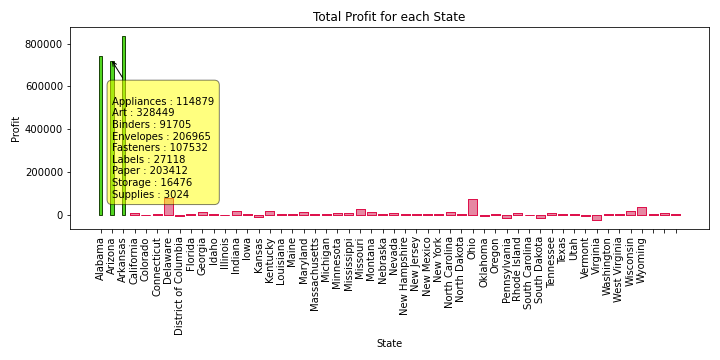

In [11]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(sales_df['Category'],sales_df['Sales'],color='#51d620',edgecolor='#1b470a',width=0.3) 
ax.set_title(label="Sales for each Category and sub-category", loc='center', pad=None)
ax.set_ylabel('Sales')
ax.set_xlabel('Category')
crs=mplcursors.cursor(ax,hover=True)
@crs.connect("add")
def on_add(sel):
    x, y, width, height = sel.artist[sel.target.index].get_bbox().bounds
    pos=int(x+width/2)
    if pos == 0:
        text=''
        for i in range(4):
            text=text+'\n'+subcat_df.index[i][1]+':'+str(int(subcat_df[i]))
    elif pos == 1:
        text=''
        for i in range(9):
            text=text+'\n'+subcat_df.index[i+4][1]+' : '+str(int(subcat_df[i]))
    else:
        text=''
        for i in range(4):
            text=text+'\n'+subcat_df.index[i+13][1]+':'+str(int(subcat_df[i]))
    
    sel.annotation.set(text=text, position=(pos, 70000))
    sel.annotation.xy = (x + width / 2, y + height)



**Subcategories and their sales can be seen upon hovering the respective Categories.**

**Find profits for each state**

In [12]:
prof_df = df.groupby('State', as_index=False)['Profit'].sum()
prof_df.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579


**The graph shows us the overall profit as well as loss (negative values) for each state. The profit/loss is calculated by adding individual values for each state.**

<IPython.core.display.Javascript object>


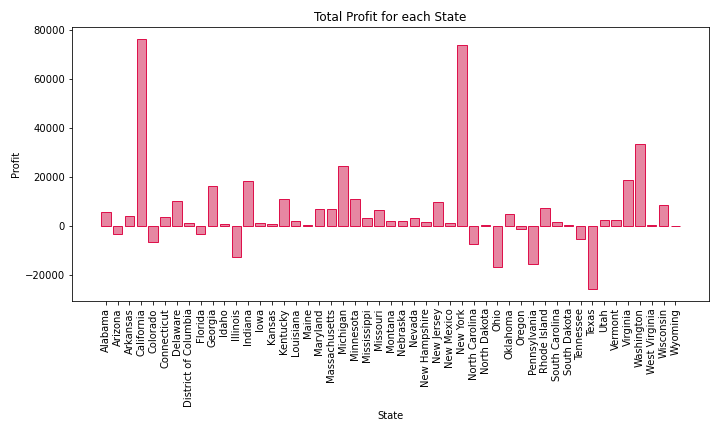

In [15]:
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(prof_df['State'],prof_df['Profit'],color='#e687a2',edgecolor='#de124c') 
ax.set_title(label="Total Profit for each State", loc='center', pad=None)
ax.set_ylabel('Profit')
ax.set_xlabel('State')
ax.set_xticklabels(prof_df['State'],rotation=90)
plt.tight_layout();

**This plot shows us the range of profit for each discount value.** **The maximum, minimum as well as median range for each discount value is shown.**

<IPython.core.display.Javascript object>


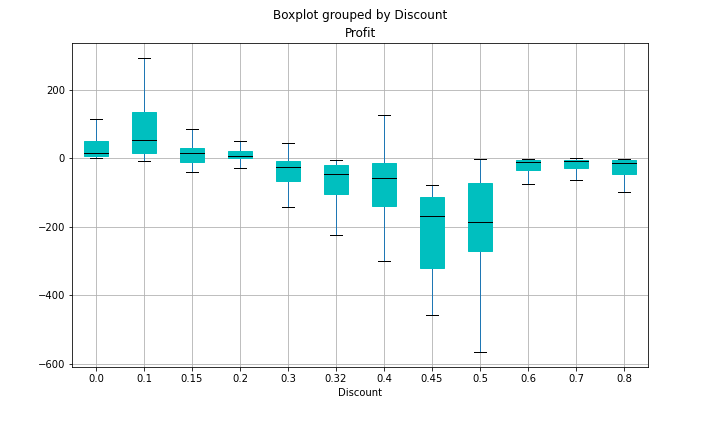

In [16]:
props = dict(boxes="c", medians="Black", caps="black")
df.boxplot(by='Discount', column='Profit',showfliers=False,figsize=(10,6),patch_artist=True,color=props)

**Analysing Loss based on various factors**

**1. Based on State**

**First we will get all the states which faced loss and find their total profit/loss across all items.**

In [17]:
state_neg=prof_df.loc[prof_df.Profit < 0]
state_neg

,State,Profit
1,Arizona,-3427.9246
4,Colorado,-6527.8579
8,Florida,-3399.3017
11,Illinois,-12607.8870
31,North Carolina,-7490.9122
33,Ohio,-16971.3766
35,Oregon,-1190.4705
36,Pennsylvania,-15559.9603
40,Tennessee,-5341.6936
41,Texas,-25729.3563


<IPython.core.display.Javascript object>


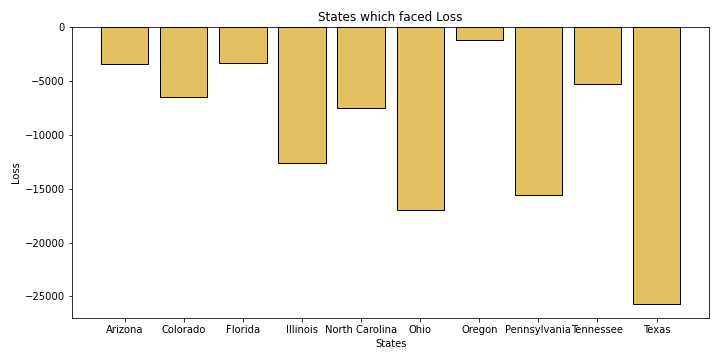

In [18]:
fig,ax = plt.subplots(figsize=(10,5))
def plot_state(ax):
    ax.bar(state_neg['State'],state_neg['Profit'],color='#e3c05f',edgecolor='black') 
#ax.legend(label, loc='upper center', fontsize='large',edgecolor='black', borderpad=1.0, shadow=True, handlelength=0)
    ax.set_title(label="States which faced Loss", loc='center', pad=None)
    ax.set_ylabel('Loss')
    ax.set_xlabel('States')
plot_state(ax)
plt.tight_layout()

**From above Visualisation we can get the states which need better deals to increase sales and earn moore profit**


**2. Based on Region**

**We will find the count of losses faced by various states and visualise them based on their Region.**

In [19]:
state_neg2=df.loc[df.Profit < 0].reset_index(drop=True)
state_pos2=df.loc[df.Profit >= 0].reset_index(drop=True)
dft=state_neg2.groupby(['Region','State'], as_index=False)['Profit'].count()
dft=dft[dft.Profit > 40]
dft

,Region,State,Profit
0,Central,Illinois,255
1,Central,Texas,486
8,East,New York,47
9,East,Ohio,209
10,East,Pennsylvania,278
13,South,Florida,126
14,South,North Carolina,68
15,South,Tennessee,65
16,West,Arizona,85
17,West,California,105


<IPython.core.display.Javascript object>


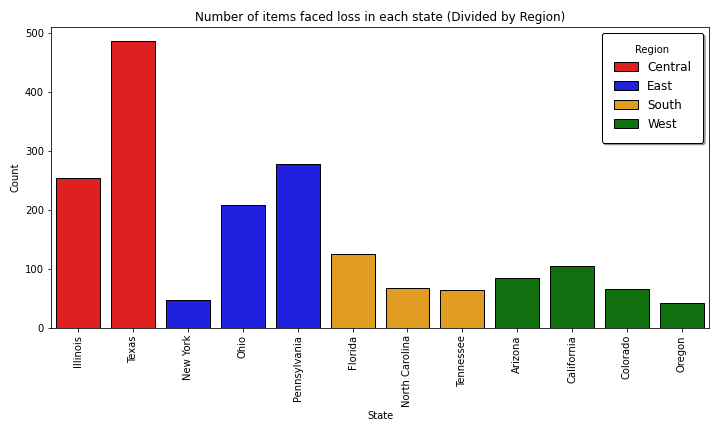

In [20]:
fig,ax = plt.subplots(figsize=(10,6))
def plot_region(ax):
    d={'Central':'r','East':'b','South':'orange','West':'g'}
    dft['color'] = dft['Region'].map(d)
    sns.barplot(data=dft, x=dft.State, y='Profit', hue='Region', palette=d, dodge=False, edgecolor='black')
    ax.set_xticklabels(dft['State'],rotation=90)
    ax.set_title(label="Number of items faced loss in each state (Divided by Region)", loc='center', pad=None)
    ax.set_ylabel('Count')
    ax.set_xlabel('State')
    ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, title="Region", shadow=True)
    plt.show()
plot_region(ax)
plt.tight_layout()

**From the above visualisation it seem's that regions like CENTRAL and East have maximum loss count along with the specific states in that region.**

**3. Based on Category**

In [21]:
state_pos2['Discount'].value_counts().reindex(df.Discount.unique(), fill_value=0).sort_values()
state_neg2['Discount'].value_counts().reindex(df.Discount.unique(), fill_value=0)
state_pos2.head()

,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Henderson,Kentucky,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
3,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
4,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694


<IPython.core.display.Javascript object>


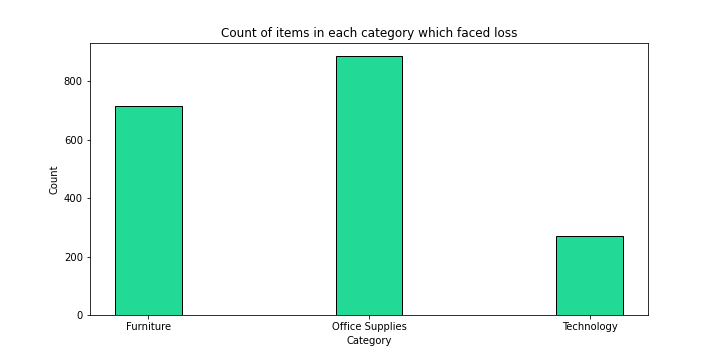

In [22]:
fig,ax = plt.subplots(figsize=(10,5))
def plot_cat(ax):
    dftn=state_neg2.groupby('Category', as_index=False)['Profit'].count()
    ax.bar(dftn['Category'],dftn['Profit'],color='#23D996',edgecolor='black',width=0.3)
    ax.set_title(label="Count of items in each category which faced loss", loc='center', pad=None)
    ax.set_ylabel('Count')
    ax.set_xlabel('Category')
plot_cat(ax)
plt.show()

**It can be seen that maximum items belonging to OFFICE SUPPLIES category have faced loss followed by FURNITURE**

**The effect of Profit and Discount on each Category**

<IPython.core.display.Javascript object>


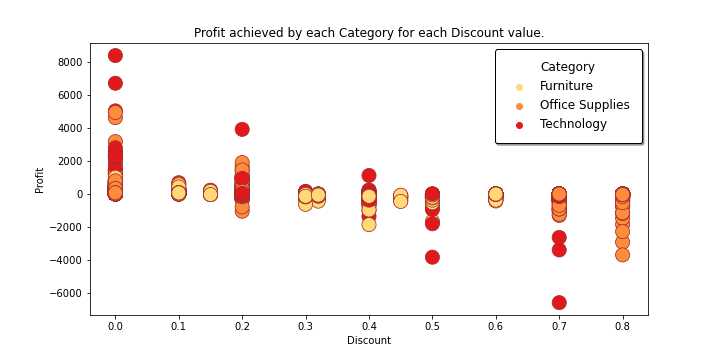

In [23]:
fig,ax = plt.subplots(figsize=(10,5))
def plot_disccat(ax):
    sns.scatterplot(x="Discount", y="Profit", data=df, hue="Category",ax=ax,s=200,palette='YlOrRd',edgecolor='brown')
    ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, shadow=True)
    ax.set_title('Profit achieved by each Category for each Discount value.')
plot_disccat(ax)
plt.show()

**4. Based on Discount**

<IPython.core.display.Javascript object>


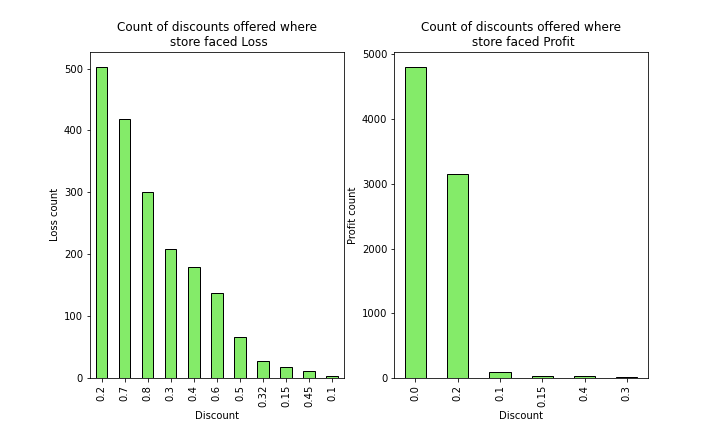

Text(0, 0.5, 'Profit count')

In [24]:
fig,((ax1,ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(10,6))
def plot_disc(ax,x):
    x['Discount'].value_counts().plot(kind = 'bar',color='#84EB69',edgecolor='black',ax=ax)
    ax.set_xlabel('Discount')
    plt.show()
plot_disc(ax1,state_neg2)
plot_disc(ax2,state_pos2)
ax1.set_ylabel('Loss count')
ax1.set_title(label="Count of discounts offered where\n store faced Loss", loc='center', pad=None)
ax2.set_title(label="Count of discounts offered where\n store faced Profit", loc='center', pad=None)
ax2.set_ylabel('Profit count')

**Higher the Discount, higher is the Loss count.**

**DASHBOARD**

**Plotting all these graphs together from which we can determine some areas requiring improvement.**

<IPython.core.display.Javascript object>


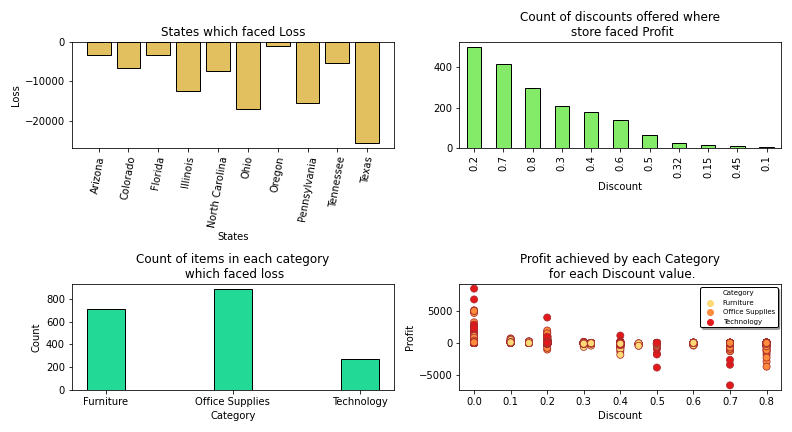

In [25]:

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(11,6))
plot_state(ax1)
plot_disc(ax2,state_neg2)
plot_cat(ax3)
#plot_disccat(ax4)
sns.scatterplot(x="Discount", y="Profit", data=df, hue="Category",ax=ax4,s=50,palette='YlOrRd',edgecolor='brown')

ax1.set_xticklabels(state_neg['State'],rotation=80)
#ax4.set_xticklabels(dft['State'],rotation=45,fontsize='small')
ax4.legend(loc=1,fontsize=7,edgecolor='black', shadow=True)
ax2.set_title(label="Count of discounts offered where\n store faced Profit", loc='center', pad=None)
ax3.set_title(label="Count of items in each category\n which faced loss", loc='center', pad=None)
ax4.set_title('Profit achieved by each Category\n for each Discount value.')


plt.tight_layout()

**Hence it can be concluded that giving high discounts can lead to Loss.**

**Solutions:**

**1. Give low discount on Office Sales products.**

**2. Advertising and improvising sales in some Central and Eastern states.**